En este archivo haremos un análisis exploratorio preliminar de los viajes de los "High Volume For-Hire Vehicle (HVFHV)" para el __primer semestre__ del año __2020__. Esta categoría empezó a aplicarse en Febrero de 2019 en NYC a vehículos con más de 10000 viajes por día.

In [1]:
import modin.pandas as pd
from distributed import Client
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Inicializa un cliente Dask para la ejecución distribuida en múltiples núcleos
client = Client(memory_limit='8GB')

In [2]:
tlc_20_01 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-01.parquet")
tlc_20_02 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-02.parquet")
tlc_20_03 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-03.parquet")
tlc_20_04 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-04.parquet")
tlc_20_05 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-05.parquet")
tlc_20_06 = pd.read_parquet("../raw_data/fhvhv_tripdata_2020-06.parquet")

In [3]:
# Todos los dataframes del primer semestre de 2020.
tlc_20_S1 = [tlc_20_01, tlc_20_02, tlc_20_03, tlc_20_04, tlc_20_05, tlc_20_06]

## Estructura general

In [4]:
tlc_20_01.dtypes

hvfhs_license_num               object
dispatching_base_num            object
originating_base_num            object
request_datetime        datetime64[ns]
on_scene_datetime       datetime64[ns]
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
PULocationID                     int64
DOLocationID                     int64
trip_miles                     float64
trip_time                        int64
base_passenger_fare            float64
tolls                          float64
bcf                            float64
sales_tax                      float64
congestion_surcharge           float64
airport_fee                    float64
tips                           float64
driver_pay                     float64
shared_request_flag             object
shared_match_flag               object
access_a_ride_flag              object
wav_request_flag                object
wav_match_flag                  object
dtype: object

Hay 24 columnas:
* 4 de tipo datetime.
* 9 de tipo float.
* 3 de tipo int.
* 8 de tipo object.

In [5]:
for df in tlc_20_S1:
    print(f"Filas: {df.shape[0]}")

Filas: 20569368
Filas: 21725100
Filas: 13392928
Filas: 4312909
Filas: 6089999
Filas: 7555193


In [6]:
tlc_20_01.head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B02864,B02864,2020-01-01 00:40:13,2020-01-01 00:43:34,2020-01-01 00:45:34,2020-01-01 01:02:20,148,90,1.93,1006,2.70,2.75,NaN,0.0,18.25,N,N,,N,N
1,HV0003,B02682,B02682,2020-01-01 00:42:31,2020-01-01 00:46:33,2020-01-01 00:47:50,2020-01-01 00:53:23,114,79,0.81,333,1.31,2.75,NaN,0.0,10.84,N,N,,N,N
2,HV0003,B02764,B02764,2020-01-01 00:01:42,2020-01-01 00:02:06,2020-01-01 00:04:37,2020-01-01 00:21:49,4,125,2.53,1032,1.39,2.75,NaN,3.0,11.73,N,N,,N,N
3,HV0003,B02764,B02764,2020-01-01 00:21:23,2020-01-01 00:26:02,2020-01-01 00:26:36,2020-01-01 00:33:00,231,113,1.11,384,0.75,2.75,NaN,0.0,5.84,N,N,,N,N
4,HV0003,B02764,B02764,2020-01-01 00:32:20,2020-01-01 00:37:06,2020-01-01 00:37:49,2020-01-01 00:46:59,114,144,1.10,550,1.03,2.75,NaN,0.0,7.69,N,N,,N,N


## Duplicados

Vamos a analizar la presencia de duplicados. Al haber tantas columnas, vamos a elegir un subset representativo. En caso de encontrar duplicados aplicaremos distintas estrategias.

In [4]:
#tlc_20_01.duplicated().sum()

216

In [4]:
#tlc_20_02.duplicated().sum()

0

In [4]:
#tlc_20_03.duplicated().sum()

0

In [4]:
#tlc_20_04.duplicated().sum()

0

In [4]:
#tlc_20_05.duplicated().sum()

0

In [4]:
#tlc_20_06.duplicated().sum()

419

## hvfhs_license_num

In [4]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.hvfhs_license_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [5]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{df.hvfhs_license_num.unique()}")

Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0005' 'HV0003' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0005' 'HV0004']
Los valores únicos por mes: ['HV0003' 'HV0004' 'HV0005']
Los valores únicos por mes: ['HV0005' 'HV0003' 'HV0004']


In [6]:
for df in tlc_20_S1:
    print(df.hvfhs_license_num.value_counts(normalize=True), "\n")

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


hvfhs_license_num
HV0003    0.708944
HV0005    0.256413
HV0004    0.034644
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.724674
HV0005    0.245778
HV0004    0.029548
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.734476
HV0005    0.240391
HV0004    0.025133
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.719430
HV0005    0.265269
HV0004    0.015301
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.715826
HV0005    0.266255
HV0004    0.017919
Name: proportion, dtype: float64 

hvfhs_license_num
HV0003    0.676926
HV0005    0.305864
HV0004    0.017210
Name: proportion, dtype: float64 



Entre el 71-73% de las licencias corresponden a HV0003 (Uber) entre el 24-30% de las licencias corresponden a HV0005 (Lyft) y menos del 1% corresponden a HV0004 (Via).

## dispatching_base_num

In [7]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.dispatching_base_num.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [8]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{sorted(df.dispatching_base_num.unique())}")

Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B02884', 'B02887', 'B02888', 'B02889', 'B03136']
Los valores únicos por mes: ['B02395', 'B02510', 'B02512', 'B02617', 'B02682', 'B02764', 'B02765', 'B02800', 'B02835', 'B02836', 'B02844', 'B02864', 'B02865', 'B02866', 'B02867', 'B02869', 'B02870', 'B02871', 'B02872', 'B02875', 'B02876', 'B02877', 'B02878', 'B02879', 'B02880', 'B02882', 'B02883', 'B0

Cada base está asociada con una compañía distinta.

## originating_base_num

In [9]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.originating_base_num.isna().mean()}")

Promedio de nulos por mes: 0.2908277493017773
Promedio de nulos por mes: 0.27511509728378697
Promedio de nulos por mes: 0.2652517059749743
Promedio de nulos por mes: 0.2801821230172025
Promedio de nulos por mes: 0.2837240203159311
Promedio de nulos por mes: 0.32297838056552625


Hay un promedio de 26-32% de valores faltantes en esta columna.

In [10]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{df.originating_base_num.unique()}")

Los valores únicos por mes: ['B02864' 'B02682' 'B02764' 'B02870' 'B02836' 'B02875' 'B02617' 'B02883'
 'B02872' None 'B02882' 'B02869' 'B02887' 'B02765' 'B02879' 'B02880'
 'B02888' 'B02871' 'B02835' 'B02884' 'B02877' 'B02878' 'B02876' 'B02889'
 'B02395' 'B02867' 'B02866' 'B02865' 'B02512' 'B02844' 'B02800' 'B03136'
 'B02729' 'B03153' 'B00446' 'B02390' 'B02537' 'B02510' 'B02913' 'B00887']
Los valores únicos por mes: ['B02872' 'B02682' 'B02764' None 'B02875' 'B02836' 'B02869' 'B02887'
 'B02888' 'B02879' 'B02882' 'B02880' 'B02617' 'B02883' 'B02866' 'B02876'
 'B02878' 'B02864' 'B02765' 'B02884' 'B02871' 'B02889' 'B02512' 'B02395'
 'B02865' 'B02835' 'B02877' 'B02870' 'B02867' 'B02510' 'B03136' 'B02800'
 'B02729' 'B03153' 'B02826' 'B01985' 'B00887' 'B02913' 'B00457' 'B00446'
 'B02468']
Los valores únicos por mes: [None 'B02764' 'B02682' 'B02765' 'B02864' 'B02880' 'B02882' 'B02869'
 'B02884' 'B02887' 'B02836' 'B02879' 'B02872' 'B02617' 'B02866' 'B02876'
 'B02888' 'B02878' 'B02883' 'B02835' 'B0

## request_datetime

In [11]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.request_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 1.6420363944230533e-07
Promedio de nulos por mes: 0.0


El promedio de nulos es muy bajo.

In [12]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.request_datetime.describe()}\n")

La descripción de cada mes es: count                         20569368
mean     2020-01-17 01:15:47.482221056
min                2019-12-31 22:59:17
25%                2020-01-09 17:07:10
50%                2020-01-17 11:37:08
75%                2020-01-24 19:35:46
max                2020-01-31 23:59:28
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         21725100
mean     2020-02-15 18:24:39.466567680
min                2020-01-31 22:44:20
25%                2020-02-08 11:48:13
50%         2020-02-15 14:50:50.500000
75%                2020-02-22 23:29:49
max                2020-03-01 00:10:00
Name: request_datetime, dtype: object

La descripción de cada mes es: count                         13392928
mean     2020-03-11 11:51:10.619442944
min                2020-02-29 16:22:20
25%                2020-03-05 18:50:37
50%         2020-03-10 00:19:26.500000
75%                2020-03-15 14:07:42
max                2020-04-01 00:10:00
Name: requ

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## on_scene_datetime

In [13]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.on_scene_datetime.isna().mean()}")

Promedio de nulos por mes: 0.2908277493017773
Promedio de nulos por mes: 0.27511509728378697
Promedio de nulos por mes: 0.2652518553075175
Promedio de nulos por mes: 0.2801821230172025
Promedio de nulos por mes: 0.28372418451957054
Promedio de nulos por mes: 0.3225200203356817


Hay un promedio de 26-32% de valores faltantes en esta columna.

In [14]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.on_scene_datetime.describe()}\n")

La descripción de cada mes es: count                         14587225
mean     2020-01-17 00:16:01.454097920
min                2019-12-31 23:46:18
25%                2020-01-09 15:16:21
50%                2020-01-17 09:38:43
75%                2020-01-24 19:36:37
max                2020-02-01 00:02:16
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                         15748197
mean     2020-02-15 20:23:21.799357952
min                2020-01-31 22:48:25
25%                2020-02-08 12:39:16
50%                2020-02-15 17:00:00
75%                2020-02-23 01:24:57
max                2020-02-29 23:59:57
Name: on_scene_datetime, dtype: object

La descripción de cada mes es: count                          9840429
mean     2020-03-11 13:54:56.767942144
min                2020-02-29 16:24:35
25%                2020-03-05 19:22:35
50%                2020-03-10 06:38:02
75%                2020-03-15 17:52:24
max                2020-03-31 23:59:19
Name: on

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## pickup_datetime

In [15]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.pickup_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [16]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.pickup_datetime.describe()}\n")

La descripción de cada mes es: count                         20569368
mean     2020-01-17 01:20:09.866663680
min                2020-01-01 00:00:00
25%                2020-01-09 17:11:32
50%                2020-01-17 11:41:21
75%                2020-01-24 19:40:04
max                2020-01-31 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         21725100
mean     2020-02-15 18:29:18.510545664
min                2020-02-01 00:00:00
25%                2020-02-08 11:52:42
50%                2020-02-15 14:55:11
75%                2020-02-22 23:34:45
max                2020-02-29 23:59:59
Name: pickup_datetime, dtype: object

La descripción de cada mes es: count                         13392928
mean     2020-03-11 11:55:43.349130240
min                2020-03-01 00:00:00
25%                2020-03-05 18:55:48
50%                2020-03-10 00:23:46
75%                2020-03-15 14:11:30
max                2020-03-31 23:59:59
Name: pickup

No se observan outliers ni superposiciones entre los meses.

## dropoff_datetime

In [17]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.dropoff_datetime.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [18]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.dropoff_datetime.describe()}\n")

La descripción de cada mes es: count                         20569368
mean     2020-01-17 01:37:30.302956800
min                2020-01-01 00:01:17
25%                2020-01-09 17:31:10
50%                2020-01-17 11:59:11
75%                2020-01-24 19:57:17
max                2020-02-01 04:05:40
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         21725100
mean     2020-02-15 18:47:01.886547456
min                2020-02-01 00:02:11
25%                2020-02-08 12:08:46
50%                2020-02-15 15:12:01
75%                2020-02-22 23:51:36
max                2020-03-01 07:03:21
Name: dropoff_datetime, dtype: object

La descripción de cada mes es: count                         13392928
mean     2020-03-11 12:12:38.851674368
min                2020-03-01 00:02:03
25%                2020-03-05 19:15:09
50%                2020-03-10 00:39:24
75%                2020-03-15 14:27:00
max                2020-04-01 01:17:28
Name: drop

No se observan outliers. Los valores extremos se superponen entre meses en algunos casos.

## PULocationID

In [19]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.PULocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [20]:
for df in tlc_20_S1:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.PULocationID.nunique()}")

El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 260
El número de zonas únicas de cada mes es: 260
El número de zonas únicas de cada mes es: 260


Es la zona de taxi TLC donde inició el viaje. Hay 265 en total.

In [21]:
for df in tlc_20_S1:
    print(f"Mínimo: {df.PULocationID.min()}, Máximo {df.PULocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## DOLocationID

In [22]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.DOLocationID.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [23]:
for df in tlc_20_S1:
    print(f"El número de zonas únicas de cada mes es: "
          f"{df.DOLocationID.nunique()}")

El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261
El número de zonas únicas de cada mes es: 262
El número de zonas únicas de cada mes es: 261


Es la zona de taxi TLC donde culminó el viaje. Hay 265 en total.

In [24]:
for df in tlc_20_S1:
    print(f"Mínimo: {df.DOLocationID.min()}, Máximo {df.DOLocationID.max()}")

Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265
Mínimo: 1, Máximo 265


No se observan outliers en esta columna.

## trip_miles

In [25]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_miles.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [26]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.trip_miles.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     4.556780e+00
std      5.415823e+00
min      0.000000e+00
25%      1.483000e+00
50%      2.710000e+00
75%      5.478000e+00
max      3.395500e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     4.548314e+00
std      5.273029e+00
min      0.000000e+00
25%      1.503000e+00
50%      2.750000e+00
75%      5.500000e+00
max      4.682800e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     4.604680e+00
std      5.290254e+00
min      0.000000e+00
25%      1.570000e+00
50%      2.862000e+00
75%      5.630000e+00
max      1.310510e+03
Name: trip_miles, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     4.608681e+00
std      4.935660e+00
min      0.000000e+00
25%      1.670000e+00
50%      3.040000e+00
75%      5.820000e+00
max      5.650600e+02
Name: trip_miles, dtype: float64

La descripción de cada mes es: count

Las distancias de 0 millas parecen ser errores. Veamos algunos ejemplos.

In [27]:
tlc_20_01[tlc_20_01.trip_miles == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
34,HV0005,B02510,None,2020-01-01 00:26:08,NaT,2020-01-01 00:43:30,2020-01-01 01:23:49,148,85,0.0,2419,1.80,0.75,NaN,0.0,0.0,Y,Y,N,N,N
35,HV0005,B02510,None,2020-01-01 00:37:21,NaT,2020-01-01 00:53:32,2020-01-01 01:09:38,148,17,0.0,966,1.17,0.75,NaN,0.0,0.0,Y,Y,N,N,N
117,HV0005,B02510,None,2020-01-01 00:16:30,NaT,2020-01-01 00:20:12,2020-01-01 00:34:13,79,233,0.0,841,0.61,0.75,NaN,0.0,0.0,Y,N,N,N,N
127,HV0005,B02510,None,2020-01-01 00:37:39,NaT,2020-01-01 00:44:46,2020-01-01 01:08:25,170,66,0.0,1419,1.94,0.75,NaN,0.0,0.0,Y,Y,N,N,N
128,HV0005,B02510,None,2020-01-01 00:41:12,NaT,2020-01-01 00:47:05,2020-01-01 01:19:21,170,49,0.0,1936,1.79,0.75,NaN,0.0,0.0,Y,Y,N,N,N


Vemos viajes entre buroughs en general. Pueden ser errores o pueden ser viajes menores a 0,1 millas (160 m). Vamos a analizar outliers.

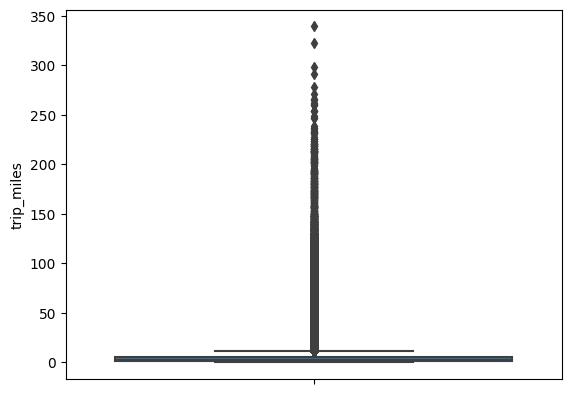

In [28]:
sns.boxplot(data = tlc_20_01, y="trip_miles");

Se observan numerosos outliers por este método. Quedará determinar si corresponde a errores o es debido a la dispersión de los datos. La superficie de NYC es de aproximadamente 468 millas cuadradas.

## trip_time

In [29]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.trip_time.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [30]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.trip_time.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     1.040438e+03
std      7.094020e+02
min      0.000000e+00
25%      5.470000e+02
50%      8.600000e+02
75%      1.334000e+03
max      5.048900e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     1.063388e+03
std      7.270870e+02
min      0.000000e+00
25%      5.570000e+02
50%      8.810000e+02
75%      1.368000e+03
max      8.489400e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     1.013237e+03
std      6.975439e+02
min      0.000000e+00
25%      5.360000e+02
50%      8.370000e+02
75%      1.293000e+03
max      7.209300e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     8.214339e+02
std      5.218739e+02
min      0.000000e+00
25%      4.740000e+02
50%      7.080000e+02
75%      1.035000e+03
max      4.385400e+04
Name: trip_time, dtype: float64

La descripción de cada mes es: count    

Tiempos de viaje de 0 segundos podrían ser errores. Veamos algunos casos.

In [31]:
tlc_20_01[tlc_20_01.trip_time == 0].head()

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
767028,HV0003,B02887,B02887,2020-01-02 06:01:48,2020-01-02 06:01:55,2020-01-02 06:02:11,2020-01-02 06:02:11,144,144,0.0,0,0.64,2.75,NaN,0.00,6.09,N,N,,N,N
793944,HV0004,B02800,None,2020-01-02 07:54:27,NaT,2020-01-02 08:37:13,2020-01-02 08:37:13,239,162,0.0,0,0.37,0.00,NaN,1.05,0.00,Y,N,N,N,N
2185453,HV0003,B02764,B02764,2020-01-04 17:20:26,2020-01-04 17:24:11,2020-01-04 17:26:11,2020-01-04 17:26:12,119,119,0.0,0,0.64,0.00,NaN,0.00,154.18,N,N,,N,N
4518758,HV0003,B02875,B02875,2020-01-08 17:48:45,2020-01-08 17:53:27,2020-01-08 17:55:22,2020-01-08 17:55:22,39,39,0.0,0,0.64,0.00,NaN,0.00,0.00,N,N,,N,Y
5314526,HV0003,B02764,B02764,2020-01-09 21:00:37,2020-01-09 21:00:57,2020-01-09 21:00:57,2020-01-09 21:00:57,246,246,0.0,0,0.64,2.75,NaN,0.00,0.00,N,N,,N,N


Observamos casos donde el pickup_time coincide con el dropoff_time o difieren por pocos segundos, por lo que es factible que se trate de errores. Hagamos un análisis preliminar de outliers.

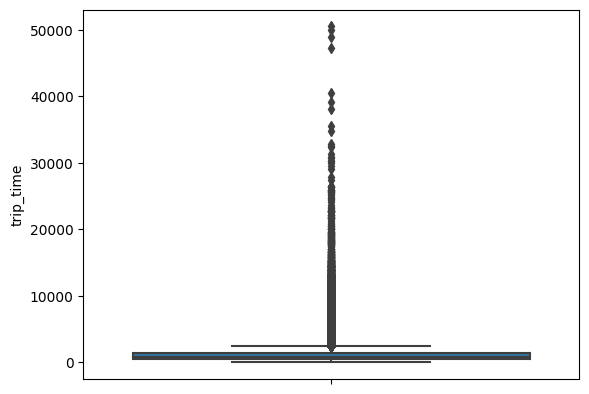

In [32]:
sns.boxplot(data = tlc_20_01, y="trip_time");

También se observan numerosos outliers que corresponderá estudiar.

## base_passenger_fare

In [33]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.base_passenger_fare.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [34]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.base_passenger_fare.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     1.701709e+01
std      1.611271e+01
min     -1.277800e+02
25%      7.720000e+00
50%      1.199000e+01
75%      2.029000e+01
max      1.461660e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     1.656520e+01
std      1.615643e+01
min     -2.085200e+02
25%      7.190000e+00
50%      1.147000e+01
75%      2.001000e+01
max      8.157740e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     1.635973e+01
std      1.532755e+01
min     -1.282300e+02
25%      7.490000e+00
50%      1.179000e+01
75%      1.980000e+01
max      1.336250e+03
Name: base_passenger_fare, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     1.638240e+01
std      1.263565e+01
min     -1.135600e+02
25%      8.120000e+00
50%      1.257000e+01
75%      2.005000e+01
max      1.238760e+03
Name: base_passenger_fare, dtype: float64



Las tarifas negativas probablemente sean errores. Aquellas tarifas en el orden de 10^3, también es posible que sean errores, por alejarse del resto de los cuartilos. Hagamos un análisis preliminar de outliers.

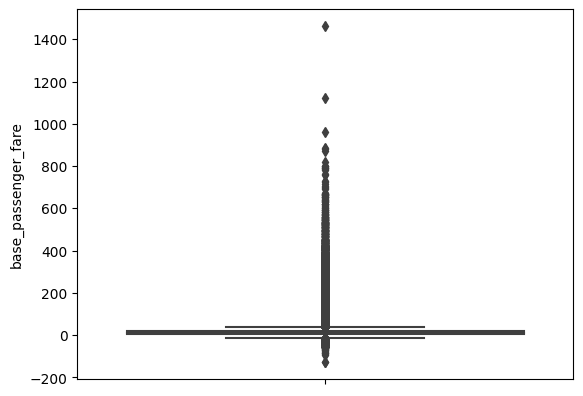

In [35]:
sns.boxplot(data = tlc_20_01, y="base_passenger_fare");

Se observan numerosos outliers por este método, por lo que corresponderá revisar si corresponden a errores en los datos o no.

## tolls

In [36]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.tolls.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [37]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.tolls.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     8.423652e-01
std      3.417818e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.187200e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     8.511666e-01
std      3.411343e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.025000e+02
Name: tolls, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     7.971854e-01
std      3.282952e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.300000e+01
Name: tolls, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     5.711438e-01
std      2.679145e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.928000e+01
Name: tolls, dtype: float64

La descripción de cada mes es: count    6.089999e+06
mea

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

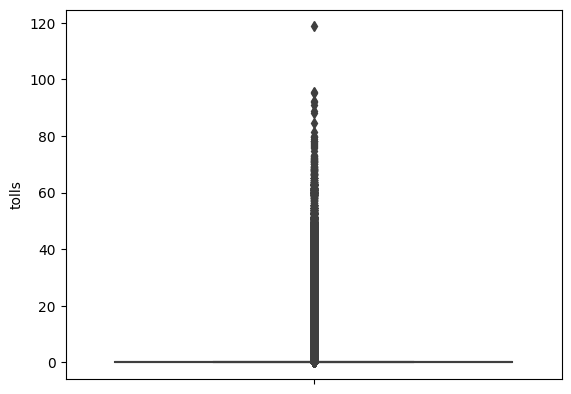

In [38]:
sns.boxplot(data = tlc_20_01, y="tolls");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## bcf

In [39]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.bcf.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [40]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.bcf.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     4.402388e-01
std      4.736847e-01
min      0.000000e+00
25%      1.800000e-01
50%      2.900000e-01
75%      5.200000e-01
max      3.707000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     4.248253e-01
std      4.626944e-01
min      0.000000e+00
25%      1.800000e-01
50%      2.800000e-01
75%      5.000000e-01
max      2.039600e+02
Name: bcf, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     4.236022e-01
std      4.464393e-01
min      0.000000e+00
25%      1.800000e-01
50%      2.900000e-01
75%      5.000000e-01
max      6.958000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     4.187853e-01
std      3.659947e-01
min      0.000000e+00
25%      2.000000e-01
50%      3.100000e-01
75%      5.100000e-01
max      3.406000e+01
Name: bcf, dtype: float64

La descripción de cada mes es: count    6.089999e+06
mean     4.

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

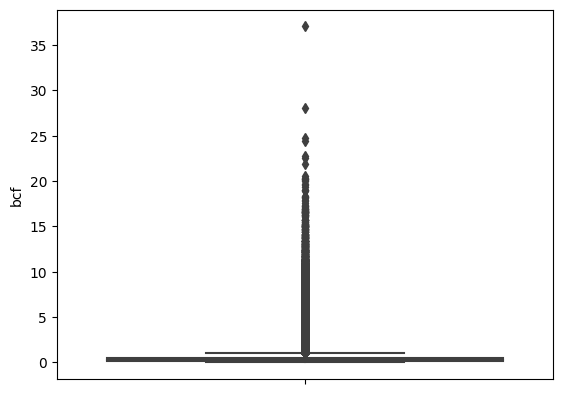

In [41]:
sns.boxplot(data = tlc_20_01, y="bcf");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## sales_tax

In [42]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.sales_tax.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [43]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.sales_tax.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     1.405656e+00
std      1.309837e+00
min      0.000000e+00
25%      6.400000e-01
50%      1.000000e+00
75%      1.710000e+00
max      7.202000e+01
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     1.354162e+00
std      1.295228e+00
min      0.000000e+00
25%      6.400000e-01
50%      9.500000e-01
75%      1.660000e+00
max      7.240800e+02
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     1.367589e+00
std      1.250174e+00
min      0.000000e+00
25%      6.400000e-01
50%      9.900000e-01
75%      1.690000e+00
max      9.613000e+01
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     1.424958e+00
std      1.105838e+00
min      0.000000e+00
25%      7.000000e-01
50%      1.090000e+00
75%      1.750000e+00
max      6.297000e+01
Name: sales_tax, dtype: float64

La descripción de cada mes es: count    

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

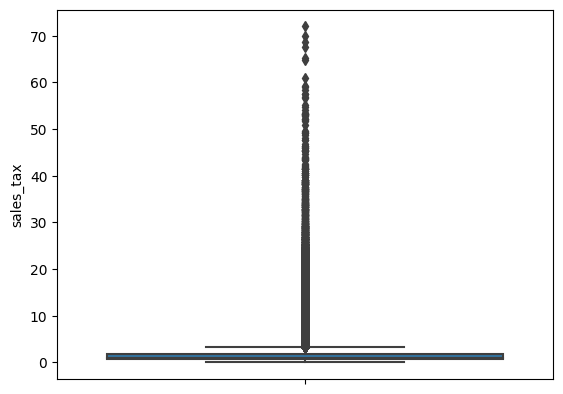

In [44]:
sns.boxplot(data = tlc_20_01, y="sales_tax");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## congestion_surcharge

In [45]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.congestion_surcharge.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [46]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.congestion_surcharge.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     9.744287e-01
std      1.261104e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      8.250000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     1.000773e+00
std      1.270717e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      8.250000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     8.436457e-01
std      1.227085e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.750000e+00
max      8.250000e+00
Name: congestion_surcharge, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     5.780185e-01
std      1.120517e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.500000e+00
Name: congestion_surcharge, dtype: float

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

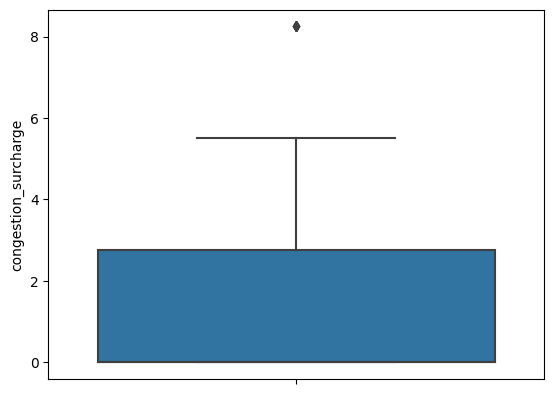

In [47]:
sns.boxplot(data = tlc_20_01, y="congestion_surcharge");

Se observan outliers por encima del bigote superior. No obstante, dado los valores absolutos, no parecen ser errores.

## airport_fee

In [48]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.airport_fee.isna().mean()}")

Promedio de nulos por mes: 0.9999979095128251
Promedio de nulos por mes: 0.9999891830187203
Promedio de nulos por mes: 0.9999982080094808
Promedio de nulos por mes: 1.0
Promedio de nulos por mes: 0.999982922821498
Promedio de nulos por mes: 0.9999994705628301


Hay un promedio de nulos superior al 99%.

In [49]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.airport_fee.describe()}\n")

La descripción de cada mes es: count    43.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    235.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    24.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count     0.0
mean     <NA>
std      <NA>
min      <NA>
25%      <NA>
50%      <NA>
75%      <NA>
max      <NA>
Name: airport_fee, dtype: Float64

La descripción de cada mes es: count    104.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: airport_fee, dtype: float64

La descripción de cada mes es: count    4.0
mean     0.0
std      0.0
min      0.0
25%      0.

Todos los valores son 0 o nulos.

## tips

In [50]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.tips.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [51]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.tips.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     6.074975e-01
std      2.186553e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     5.991389e-01
std      2.150105e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     5.263801e-01
std      2.067542e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     4.481358e-01
std      2.133796e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.000000e+02
Name: tips, dtype: float64

La descripción de cada mes es: count    6.089999e+06
mean   

Los valores mínimos de 0 son factibles. Hagamos un análisis preliminar de outliers para ver los superiores.

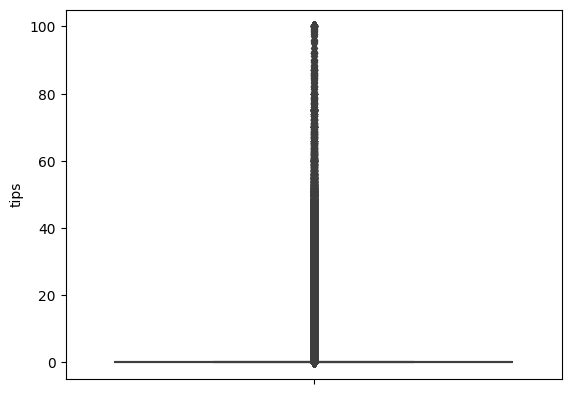

In [52]:
sns.boxplot(data = tlc_20_01, y="tips");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## driver_pay

In [53]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.driver_pay.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [54]:
for df in tlc_20_S1:
    print(f"La descripción de cada mes es: "
          f"{df.driver_pay.describe()}\n")

La descripción de cada mes es: count    2.056937e+07
mean     1.311404e+01
std      1.281221e+01
min     -1.517200e+02
25%      5.600000e+00
50%      9.610000e+00
75%      1.656000e+01
max      1.054270e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    2.172510e+07
mean     1.359126e+01
std      1.288244e+01
min     -1.710000e+02
25%      5.770000e+00
50%      1.015000e+01
75%      1.725000e+01
max      4.894620e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    1.339293e+07
mean     1.368324e+01
std      1.244444e+01
min     -2.393300e+02
25%      6.120000e+00
50%      1.039000e+01
75%      1.727000e+01
max      2.048770e+03
Name: driver_pay, dtype: float64

La descripción de cada mes es: count    4.312909e+06
mean     1.268058e+01
std      1.000812e+01
min     -1.255700e+02
25%      6.250000e+00
50%      9.880000e+00
75%      1.564000e+01
max      9.309400e+02
Name: driver_pay, dtype: float64

La descripción de cada mes es: count

Los valores negativos es probable que sean errores. Haremos un análisis preliminar de outliers.

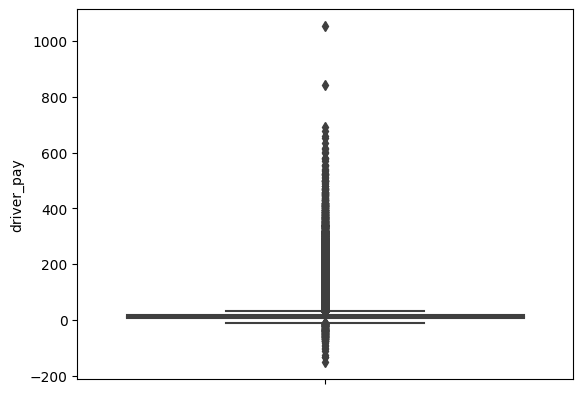

In [55]:
sns.boxplot(data = tlc_20_01, y="driver_pay");

Según este método, hay outliers por encima del bigote superior. Queda determinar si son errores o se deben a la distribución de los datos.

## shared_request_flag

In [56]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [57]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{df.shared_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


Las proporciones de pasajeros que solicitaron compartir viajes fueron:

In [58]:
for df in tlc_20_S1:
    print(df.shared_request_flag.value_counts(normalize=True), "\n")

shared_request_flag
N    0.820373
Y    0.179627
Name: proportion, dtype: float64 

shared_request_flag
N    0.8325
Y    0.1675
Name: proportion, dtype: float64 

shared_request_flag
N    0.869146
Y    0.130854
Name: proportion, dtype: float64 

shared_request_flag
N    9.999998e-01
Y    2.318621e-07
Name: proportion, dtype: float64 

shared_request_flag
N    9.999992e-01
Y    8.210182e-07
Name: proportion, dtype: float64 

shared_request_flag
N    0.99998
Y    0.00002
Name: proportion, dtype: float64 



## shared_match_flag

In [59]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.shared_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [60]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{df.shared_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N']
Los valores únicos por mes: ['N']
Los valores únicos por mes: ['N']


In [61]:
for df in tlc_20_S1:
    print(df.shared_match_flag.value_counts(normalize=True), "\n")

shared_match_flag
N    0.893886
Y    0.106114
Name: proportion, dtype: float64 

shared_match_flag
N    0.896508
Y    0.103492
Name: proportion, dtype: float64 

shared_match_flag
N    0.924199
Y    0.075801
Name: proportion, dtype: float64 

shared_match_flag
N    1.0
Name: proportion, dtype: float64 

shared_match_flag
N    1.0
Name: proportion, dtype: float64 

shared_match_flag
N    1.0
Name: proportion, dtype: float64 



## access_a_ride_flag

In [62]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.access_a_ride_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [63]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{df.access_a_ride_flag.unique()}")

Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: ['N' ' ']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: [' ' 'N']
Los valores únicos por mes: ['N' ' ']


Según el diccionario de datos, esta columna puede tomar los valores 'Y' o 'N'. La presencia de un string vacio puede hablar de problemas en la calidad de los datos.

## wav_request_flag

In [64]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_request_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [65]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{df.wav_request_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [66]:
for df in tlc_20_S1:
    print(df.wav_request_flag.value_counts(normalize=True), "\n")

wav_request_flag
N    0.999194
Y    0.000806
Name: proportion, dtype: float64 

wav_request_flag
N    0.999235
Y    0.000765
Name: proportion, dtype: float64 

wav_request_flag
N    0.999157
Y    0.000843
Name: proportion, dtype: float64 

wav_request_flag
N    0.998975
Y    0.001025
Name: proportion, dtype: float64 

wav_request_flag
N    0.998845
Y    0.001155
Name: proportion, dtype: float64 

wav_request_flag
N    0.998566
Y    0.001434
Name: proportion, dtype: float64 



En todos los meses, menos del 1% de los pasajeros solicitaron vehículos accesibles para sillas de ruedas.

## wav_match_flag

In [67]:
for df in tlc_20_S1:
    print(f"Promedio de nulos por mes: "
          f"{df.wav_match_flag.isna().mean()}")

Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0
Promedio de nulos por mes: 0.0


In [68]:
for df in tlc_20_S1:
    print(f"Los valores únicos por mes: "
          f"{df.wav_match_flag.unique()}")

Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']
Los valores únicos por mes: ['N' 'Y']


In [69]:
for df in tlc_20_S1:
    print(df.wav_match_flag.value_counts(normalize=True), "\n")

wav_match_flag
N    0.980072
Y    0.019928
Name: proportion, dtype: float64 

wav_match_flag
N    0.978619
Y    0.021381
Name: proportion, dtype: float64 

wav_match_flag
N    0.973885
Y    0.026115
Name: proportion, dtype: float64 

wav_match_flag
N    0.956615
Y    0.043385
Name: proportion, dtype: float64 

wav_match_flag
N    0.957958
Y    0.042042
Name: proportion, dtype: float64 

wav_match_flag
N    0.954368
Y    0.045632
Name: proportion, dtype: float64 



En todos los meses, entre el 1 y el 4% de los viajes sucedieron en vehículos accesibles para sillas de ruedas.